<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_10_06_MachineLearningGuide(p_175_227).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 피마 인디언 당뇨병 데이터셋

In [22]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, f1_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("./drive/MyDrive/ESAA_homework/diabetes.csv")
print(diabetes_data["Outcome"].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X= diabetes_data.iloc[:,:-1]
y= diabetes_data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 156, stratify=y)

# get_clf_eval 함수 정의하기
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print("오차행렬\n",confusion)
  print("정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}\n, AUC {4:4f}".format(accuracy,precision,recall,f1,roc_auc))

# 로지스틱 회귀로 학습. 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차행렬
 [[86 14]
 [20 34]]
정확도:0.7792, 정밀도:0.7083, 재현율:0.6296, F1:0.6667
, AUC 0.840741


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


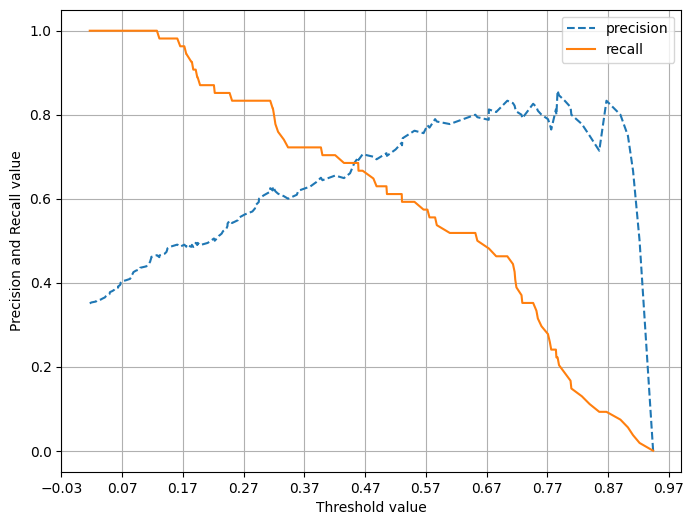

In [ ]:
# precision_recall_curve_plot 정의하기
def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle="--", label="precision")
  plt.plot(thresholds, recalls[0:threshold_boundary], label="recall")
  start,end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end,0.1),2))
  plt.xlabel("Threshold value");plt.ylabel("Precision and Recall value")
  plt.legend(); plt.grid()
  plt.show()

# precision_recall_curve_plot 실행하기
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

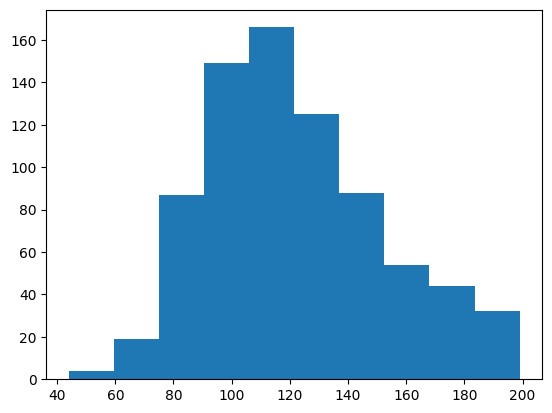

In [ ]:
plt.hist(diabetes_data["Glucose"], bins=10)
# 히스토그램을 통해 수치가 0인 데이터가 많이 존재함을 확인할 수 있다 => 포도당 수치이므로 불가능한 현상

In [ ]:
# 0값을 검사할 피처명 리스트
zero_features = ["Glucose", "BloodPressure","SkinThickness","Insulin","BMI"]

# 전체 데이터 건수
total_count = diabetes_data["Glucose"].count()

# 피처별로 반복하면서 데이터 값이 0인 건수를 추출하고 퍼센트 계산
for cname in zero_features:
  n=sum(diabetes_data[cname]==0)
  pct = n*100/diabetes_data[cname].count()
  print("{0} 0인 건수는 {1}, 퍼센트는 {2:.2f}%".format(cname,n,pct))


Glucose 0인 건수는 0, 퍼센트는 0.00%
BloodPressure 0인 건수는 0, 퍼센트는 0.00%
SkinThickness 0인 건수는 0, 퍼센트는 0.00%
Insulin 0인 건수는 0, 퍼센트는 0.00%
BMI 0인 건수는 0, 퍼센트는 0.00%


In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체(자주 쓸 것 같아 표시함)
################################################################################################
zero_features = ["Glucose", "BloodPressure","SkinThickness","Insulin","BMI"]
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features)
################################################################################################

In [ ]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄저긍로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=156, stratify=y)
# stratify를 쓰면 y의 분포를 맞춰준다

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred, pred_proba)

오차행렬
 [[86 14]
 [20 34]]
정확도:0.7792, 정밀도:0.7083, 재현율:0.6296, F1:0.6667
, AUC 0.840741


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# get_clf_eval 함수 정의하기
def get_clf_eval(y_test, pred, pred_proba):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print("오차행렬\n",confusion)
  print("정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}\n, AUC {4:4f}".format(accuracy,precision,recall,f1,roc_auc))

# get_eval_by_threshold 함수 정의하기
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test,pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print("임계값:", custom_threshold)
    get_clf_eval(y_test, custom_predict,pred_proba_c1)
    print()

thresholds = [round(0.03*x,2) for x in list(np.arange(10,17))]+[0.50]
pred_proba = lr_clf.predict_proba(X_test)


get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.3
오차행렬
 [[71 29]
 [ 9 45]]
정확도:0.7532, 정밀도:0.6081, 재현율:0.8333, F1:0.7031
, AUC 0.840741

임계값: 0.33
오차행렬
 [[74 26]
 [14 40]]
정확도:0.7403, 정밀도:0.6061, 재현율:0.7407, F1:0.6667
, AUC 0.840741

임계값: 0.36
오차행렬
 [[76 24]
 [15 39]]
정확도:0.7468, 정밀도:0.6190, 재현율:0.7222, F1:0.6667
, AUC 0.840741

임계값: 0.39
오차행렬
 [[79 21]
 [15 39]]
정확도:0.7662, 정밀도:0.6500, 재현율:0.7222, F1:0.6842
, AUC 0.840741

임계값: 0.42
오차행렬
 [[80 20]
 [16 38]]
정확도:0.7662, 정밀도:0.6552, 재현율:0.7037, F1:0.6786
, AUC 0.840741

임계값: 0.45
오차행렬
 [[83 17]
 [17 37]]
정확도:0.7792, 정밀도:0.6852, 재현율:0.6852, F1:0.6852
, AUC 0.840741

임계값: 0.48
오차행렬
 [[85 15]
 [19 35]]
정확도:0.7792, 정밀도:0.7000, 재현율:0.6481, F1:0.6731
, AUC 0.840741

임계값: 0.5
오차행렬
 [[86 14]
 [20 34]]
정확도:0.7792, 정밀도:0.7083, 재현율:0.6296, F1:0.6667
, AUC 0.840741



In [ ]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차행렬
 [[85 15]
 [19 35]]
정확도:0.7792, 정밀도:0.7000, 재현율:0.6481, F1:0.6731
, AUC 0.840741


# 1. 분류
### 분류의 개요
지도학습은 레이블(label, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식입니다. 지도학습의 대표적인 유형인 분류(Classification)는 학습 데이털 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것입니다. 즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것입니다. 분류는 다양한 머신러닝 알고리즘으로 구현할 수 있습니다.
- 베이즈 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과저긍로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)



이번 장에서는 이 다양한 알고리즘 중에서 앙상블 방법(Ensemble Method)을 집중적으로 다릅니다. 앙상블은 분류에서 가장 각광을 받는 방법 중 하나입니다. 물론 이미지, 영상, 음성, NLP 영역에서 신 경망에 기반한 딥러닝 머신러닝계를 선도하고 있지만, 이를 제외한 정형 데이터의 예측 분석 영역에 서는 앙상블이 매우 높은 예측 성능으로 인해 많은 분석가와 데이터 과학자들에게 애용되고 있습니다.

**앙상블은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배경 (Bagging)과 부스팅(Boosting) 방식으로 나뉩니다.배깅 방식의 대표인 랜덤 포레스트(Random Forest)는 뛰어난 예측 성능 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘입니다.** 하지만 근래의 앙상블 방법은 부스팅 방식으로 지속해서 발전하고 있습니다. 부스팅의 효시라고 할 수 있는 그래디언트 부스팅(Gradient Boosting)의 경우 뛰어난 예측 성능을 가지 고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠습니다. 하지만 **XgBoost(eXtraGradient Boost)와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리 잡았습니다.**

이 장에서는 앙상블 방법의 개요와 랜덤 포레스트, 그래디언트 부스팅의 전통적인 앙상블 기법뿐만 아 니라 부스팅 계열의 최신 기법인 XGBoost와 LightGBM. 그리고 앙상블의 앙상블이라고 불리는 스태킹(Stacking) 기법에 대해서도 상세히 알아보겠습니다. 앙상블은 서로 다른/또는 같은 알고리즘을 결 합한다고 했는데, 대부분은 동일한 알고리즘을 결합합니다. 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리입니다.

결정 트리는 매우 쉽고 유연하게 적용될 수 알고리즘입니다. 또한 데이터의 스케일링이나 정규화 등 의 사전 가공의 영향이 매우 작습니다. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져 야 하며, 이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있습 니다. 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용합니다. 앙상블은 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류 가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약 한학습기가 되기 때문입니다.

앙상블을 학습하기 전에 먼저 결정 트리가 무엇이고 어떤 특성이 있는지 살펴보겠습니다.

# 2. 결정 트리

결정 트리(Decision Tree)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘입니다. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것입니다. 일반적으 로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것인데, 쉽게 생각하면 스무고개 게임 과 유사합니다. 따라서 **데이터의 어떤 기준을 바탕으로 규칙을 만들어 야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우합니다**.

다음 그림은 결정 트리의 구조를 간략하게 나타낸 것입니다. **규칙 노드(Decision Node)로 표시된 노 드는 규칙 조건**이 되는 것이고, **리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값**입니다. 그리 고 **새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성**됩니다. 데이터 세트에 피처가 있고 이러한 피치 가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어집니다. 하지만 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어지기 쉽습니다. 즉, **트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높습니다**.
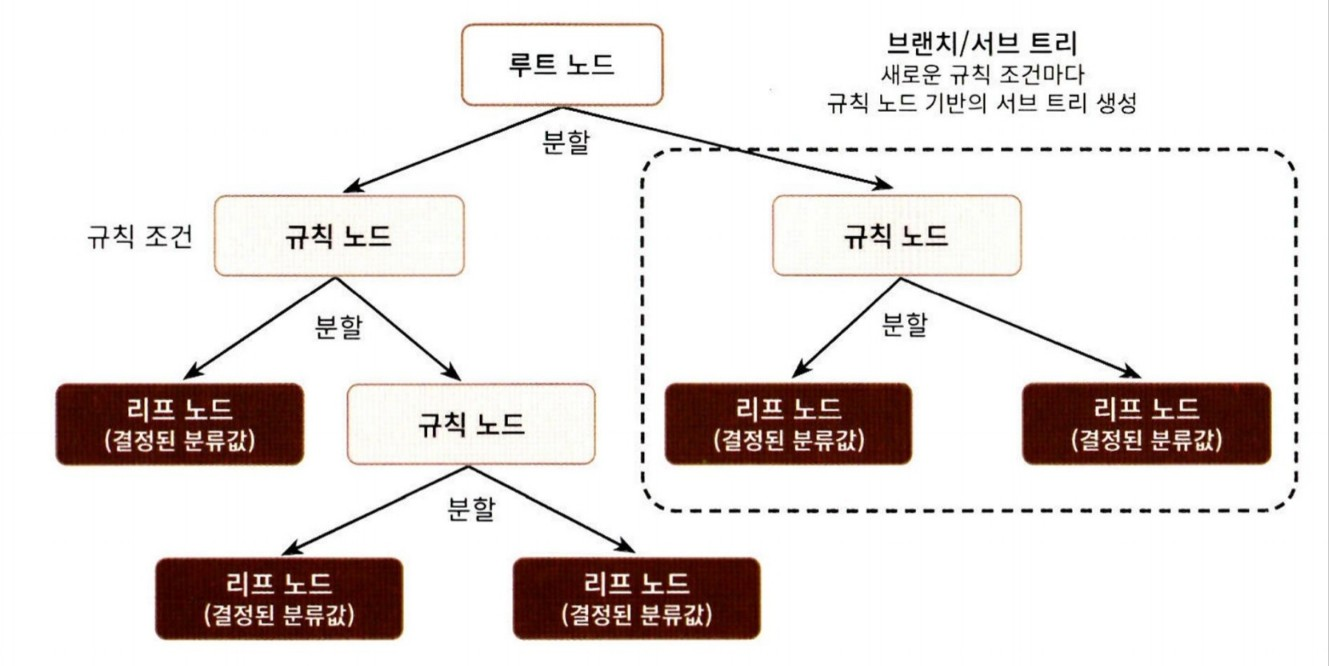

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 합니다. 이를 위해서는 **어떻게 트리를 분할(Split)할 것인가가 중요한데 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요**합니다.


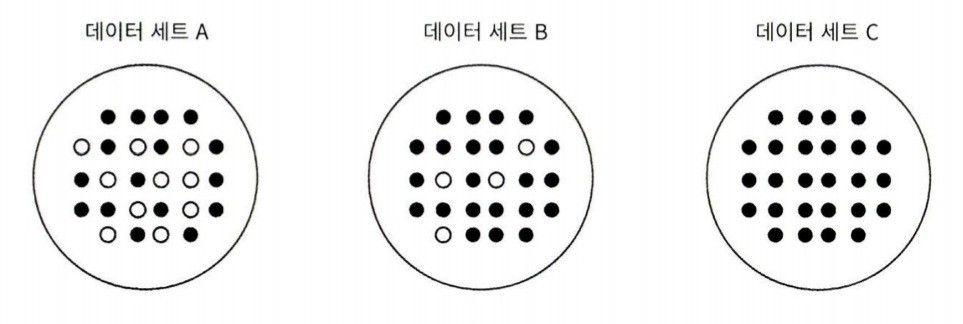
위 세 사진 준 C,B,A 순으로 데이터 균일도가 높다. A는 상대적으로 혼잡도가 높고 균일도가 낮아 같은 조건에서 데이터를 판단하나느데 더 많은 정보가 필요하다

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. 즉, 정보 균일도가 높은 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다.

이러한 정보의 균일도를 측정하는 대표적인 방법에는 엔트로피를 이용한 정보이득(Information Gain)과 지니 계수가 있습니다.

- 정보이득 : 엔트로피 개념 기반. 정보이득이 높은 속성을 기준으로 분할한다 (정보이득지수)= 1 - (엔트로피지수)  
- 지니계수 : 경제학에서 불평등 지수를 나타낼 때 사용하는 계수이다. 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다. DecisionClassifier는 지니계수를 이용한다.

### 결정 트리 모델의 특징
- 장점: 전처리 필요X
- 단점: 과적합으로 정확도가 떨어진다.(균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해지기 떄문)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

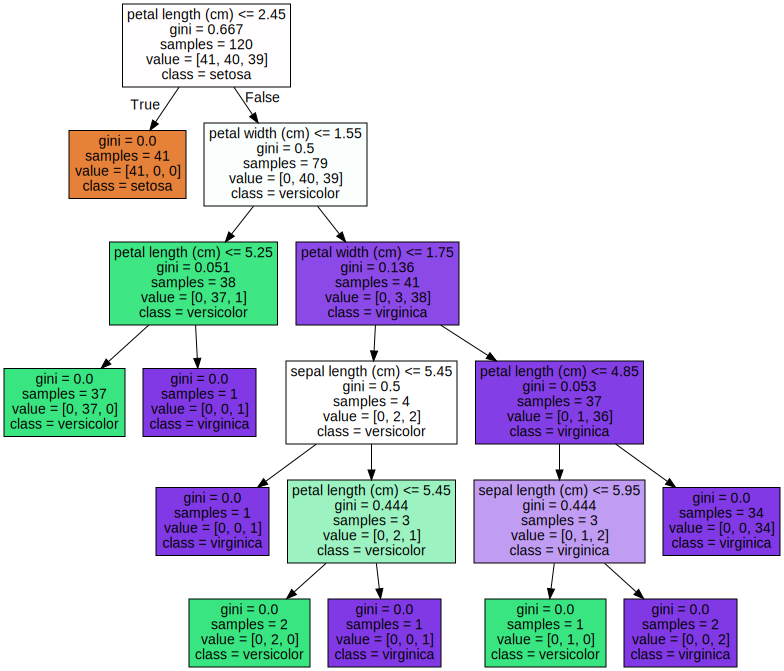

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= : 자식 노드를 만들기 위한 규칙 조건, 이 조건이 없으면 리프 노드이다

- gini : 지니 계수

- samples : 현 규칙에 해당되는 데이터 건수

- value : 클래스 값 기반의 데이터 건수
ex) value=[41,40,39]는 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성

- class : 가장 많은 개수를 차지하는 타겟값

- 결정 트리의 하이퍼 파라미터를 변경해주면 더 간단한 결정 트리가 된다 (max_depth 줄이기)

- min_samples_split : 분할하기 위한 최소한의 샘플 데이터 개수 조정
- min_samples_leaf : 리프 노트 될 수 있는 조건 조정

- feature_importance_ : 어떠한 속성을 규칙 조건으로 선택하느냐인 피처의 중요한 역할 지표 제공


Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

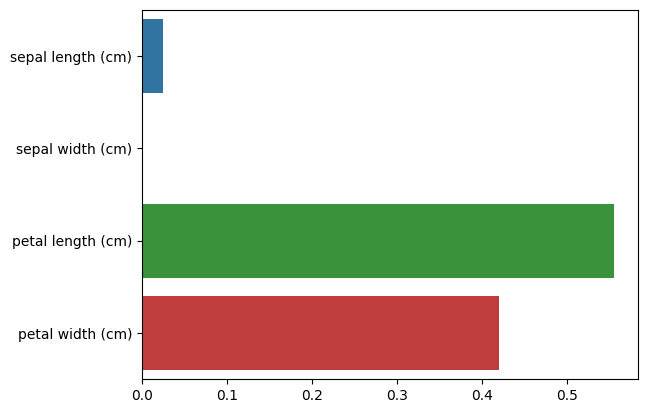

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name,value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

- 이를 통해 petal length 변수의 중요도가 가장 높음을 알 수 있다

### 결정 트리 과적합
- make_classification()함수를 이용하여 분류를 위한 test data를 쉽게 만들 수 있다.

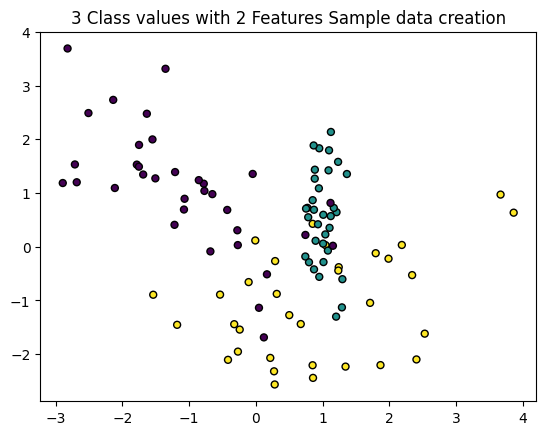

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

###########visualize_boundary 함수를 찾을 수 없어 주석처리함##############

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
#dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
#visualize_boundary(dt_clf, X_features, y_labels)

# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
# dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
# visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트
- 사용자 행동인식 데이터셋: 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가치 피처를 수집한 데이터
- 수집된 피체 세트를 기반으로 결정트리를 이용해 어떤 동작인지 예측하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./drive/MyDrive/ESAA_homework/UCI HAR Dataset/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])


전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z값으로 되어 있음을 유추할 수 있다.
- 중복된 피처명이 있어 DataFrame 로드 시 오류발생 => 원본피처명에 _1, _2 부여

In [4]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df["column_index"]>1].count())
feature_dup_df[feature_dup_df["column_index"]>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 총 42개의 피처명이 중복되어 있다
- 중복되는 피처명에 _1, _2 부여하여 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df()를 생성

In [13]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby("column_name").cumcount(), columns=["dup_cnt"])  # 같은 변수명이 있는지 확인하기 위해 groupby, 변수개수의 변수명은 dup_cnt로 한다
  feature_dup_df = feature_dup_df.reset_index()   # 인덱스가 재설정되고 이전 인덱스 열이 DataFrame에서 제거
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer') #두 데이터프레임을 외부 조인합니다. 이것은 중복된 변수와 중복 카운트 정보를 포함하는 새로운 데이터프레임을 생성한다
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1) # 중복되는 피처명에 _1, _2 부여
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [26]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./drive/MyDrive/ESAA_homework/UCI HAR Dataset/features.txt',
                                  sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_Df()를 이용, 신규 피처명은 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./drive/MyDrive/ESAA_homework/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./drive/MyDrive/ESAA_homework/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./drive/MyDrive/ESAA_homework/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./drive/MyDrive/ESAA_homework/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = get_human_dataset()

In [27]:
 # 로드한 학습용 피처 데이터 세트를 간략히 살펴보기
print("##학습 피처 데이터셋 info()")
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [29]:
print(y_train["action"].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier의 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier의 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


- 85.48%의 정확도를 나타내고 있다

In [35]:
from sklearn.model_selection import GridSearchCV
params = {"max_depth": [6,8,10,12,16,20,24]}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = "accuracy",cv = 5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최고 하이퍼 파라미터: {'max_depth': 16}


- max depth 가 16일때 accuracy는 0.8513이다

In [39]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [42]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test,pred)
  print("max_depth : {0}, 정확도:{1:.4f}".format(depth,accuracy))

max_depth : 6, 정확도:0.8558
max_depth : 8, 정확도:0.8707
max_depth : 10, 정확도:0.8673
max_depth : 12, 정확도:0.8646
max_depth : 16, 정확도:0.8575
max_depth : 20, 정확도:0.8548
max_depth : 24, 정확도:0.8548


- max_depth가 8일 때 정확도가 가장 높다

In [43]:
params = {"max_depth": [8,12,16,20],
          "min_samples_split": [16,24]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최고 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


- 별도 분리된 test데이터에 최적 하이퍼 파라미터를 적용한다

In [46]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print("결정 트리 예측 정확도:{0:.4f}".format(accuracy))

결정 트리 예측 정확도:0.8717


- 중요도가 높은 순으로 Top 20 feature을 막대그래프로 표현

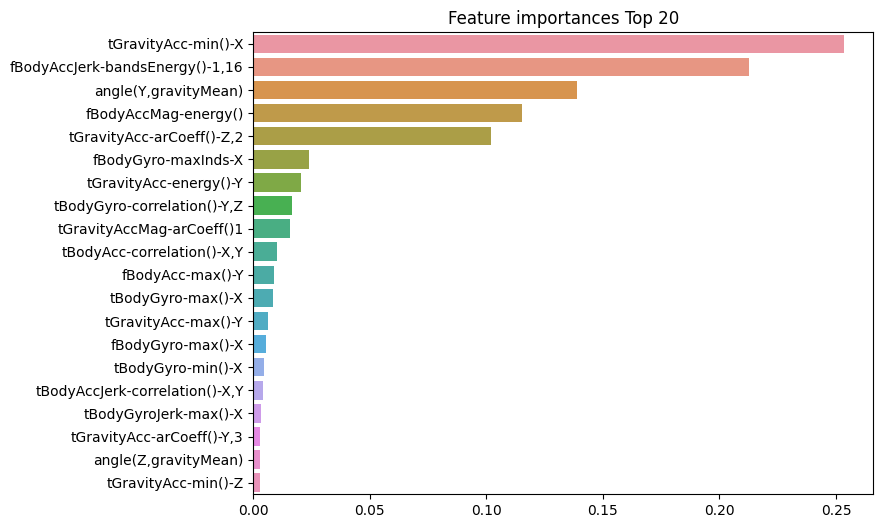

In [48]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series로 변환
ftr_importances= pd.Series(ftr_importances_values, index = X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

- 가장 높은 중요도를 가진 Top5의 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있다

# 앙상블 학습
### 앙상블 학습 개요
- 앙상블학습: 여러 개의 분류기르르 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법. 단일 분류기보다 신회성이 높은 예측값을 얻는 것이 목표이다. 정형 데이터 분류 시에 뛰어난 성능을 나타낸다. (이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있다)
- 앙상블학습의 예 ; XGBoost, LightGBM
- 앙상블학습의 유형: Voting, Bagging, Boosting
  이외에도 스태킹을 포함한 다양한 앙상블 방법이 있다.
- 스태킹: 여러 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법이다.
---
- 보팅: 서로 다른 알고리즘을 가진 분류기를 결합한다.
- 배깅: 분류기가 모두 같은 유형의 알고리즘 기반이지만 각 분류기가 데이터 샘플링을 서로 다르게 가져가(Bootstraping) 학습을 수행해 보팅(Voting)을 통해 최종 예측결과를 선정한다.
  ex) 랜덤포레스트 알고리즘
- 부스팅:
---
### 보팅 유형 - 하드 보팅(Hard Voting) & 소프트 보팅(Soft Voting)
- 하드 보팅(Hard Voting) : 다수결의 원칙과 비슷. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정한다.
- 소프트 보팅(Soft Voting) : 분류기들의 레이블 값 결정 확률을 모두 더해 이를 평균하여 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정한다. 일반적으로 소프트 보팅이 보팅 방법으로 적용된다
---
### 보팅 분류기(Voting Classifier)
사이킷런의 VotingClassifier 클래스를 이용


- 위스콘신 유방암 데이터 세트를 이용해서 로지스틱 회귀와 KNN기반 보팅 분류기를 만들어보자.

In [54]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [61]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors =8) # 8개의 level으로 비정형적 분류

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 - soft voting
vo_clf = VotingClassifier(estimators = [("LR",lr_clf), ("KNN",knn_clf)],voting = "soft") # estimators에는 분류기이름-분류기 쌍을 나타내는 튜플의 리스트가 전달됩니다.
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

- 로지스틱회귀나 KNN보다 보팅 분류기가 정확도가 더 높다

# 랜덤 포레스트
### 랜덤 포레스트의 개요 및 실습
- 랜덤 포레스트: 기반알고리즘은 결정 트리이다. 개별 트리가 학습하는 데이터셋은 전체 데이터에서 일부가 중첩되게 샘플링(Bootstrapping)된 데이터세트이다. cf) Bagging = Bootstrap aggregating

  1. 여러개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한
  2. 최종적으로 모든 분류기가 보팅을 통해 예측결정.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train,X_test,y_train,y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 데이터 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state =0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도: {0:.4f}".format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
- 트리 기반 앙상블 알고리즘의 단점: 하이퍼 파라미터가 너무 많아 튜닝을 위한 시간이 많이 소모됨
- 랜덤 포레스트는 하이퍼 파라미터 수가 적은 편이다.
---
- n_estimators: 랜덤 포레스트에서 결정 트리 개수를 지정한다. 많을수록 시간 많이 걸림
- max_features: 결정트리에서 사용된 max_featurs 파라미터와 같다.랜덤 포레스트에서도 사용가능하다
- max_depth와 min_sample_leaf : 결정 트리의 과적합 개선 파라미터. 랜덤 포레스트에서도 사용가능하다


In [66]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
params = {"n_estimators":[100],
          "max_depth":[6,8,10,12],
          "min_samples_leaf":[8,12,18],
          "min_samples_split": [8,16,20]}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state =0, n_jobs = -1) # n_jobs=-1은 모든 가능한 CPU 코어를 사용하여 작업을 병렬로 처리하도록 설정합니다.
grid_cv = GridSearchCV(rf_clf,param_grid = params, cv=2, n_jobs=-1) #cv=2는 교차 검증(cross-validation)을 2-폴드(k-fold)로 수행하도록 설정합니다. 이 값은 교차 검증의 분할 수를 의미합니다.
grid_cv.fit(X_train,y_train)
print("최적의 파라미터:\n", grid_cv.best_params_)
print("최고 예측 정확도: {0:.4f}".format(grid_cv.best_score_))

최적의 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


- 위의 최적 파라미터를 적용한 랜덤 포레스트 모델을 만든다(n_estimators만 300으로 한다)

In [69]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth = 10, min_samples_leaf = 8,
                                min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


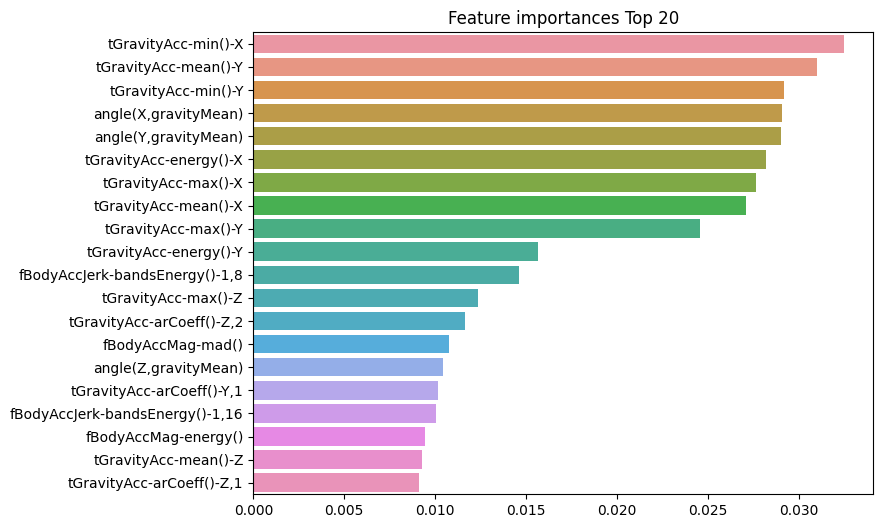

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances  = pd.Series(ftr_importances_values, index = X_train.columns)
v = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

- tGravityAcc-min()-X, tGravityAcc-mean()-Y, tGravityAcc-min()-Y 등이 높은 feature 중요도를 가지고 있다

# GBM(Gradient Boosting Machine)
### GBM의 개요 및
- 부스팅 알고리즘: 여러개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다.
- 부스팅의 예: AdaBoost, GradientBoost
---
- AdaBoost : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
- GradientBoost: AdaBoost와 비슷하나 가중치 업데이트에 경사 하강법을 적용


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings("ignore")

X_train,X_test,y_train,y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state= 0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도: {0:.4f}".format(gb_accuracy))
print("GBM 수행 시간: {0:.1f}초".format(time.time()-start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 870.1초


- 랜덤 포레스트보다 예측 성능이 조금 뛰어나지만 수행 시간이 오래 걸린다

### GBM 하이퍼 파라미터 튜닝
- n_estimator, max_depth, max_features : 트리기반 파라미터. GBM에서도 사용된다.
- learning_rate: Weak learner가 순차적으로 오류값을 보정해나간다.learning_rate를 작게 하고 n_estimator를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있으나 시간이 많이 걸린다
- subsample: weak learner가 학스베 사용하는 데이터의 샘플링 비율

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"n_estimators":[100,500],
          "learning_rate":[0.05,0.1]}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose =1)
grid_cv.fit(X_train,y_train)
print("최적 하이퍼 파라미터:\n,", grid_cv.best_params_)
print("최고 예측 정확도{0:.4f}".formats(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
